In [6]:
import numpy as np
import datetime as dt
import re
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
import pandas as pd
pd.set_option('display.max_columns',None)

In [7]:
data_org = pd.read_csv('deepq_ai_assignment1_data.csv')
data_org.head()


,UID,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,1003904-3746,14 month lease,1103.0,2015-01-08,2016-02-28,2015-07-30,2015-01-08,2015-01-08,2015-07-30,2015-07-01,NaN,False,NaN,1103.0,0,0,1,NaN,13,1-3 years,1,16,6,1,0,0,0,0,1,1,2016,2015-01-08,2015-07-30,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.0,-1.0,-1.0,1,1,1,0,1,0,1,0,0,1,25,NaN,NaN,46.120308,25.0,25,25,0,1,42000.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,2015-01-01,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.6625,0.600000
1,1003904-3751,12 month lease,1136.0,2015-01-24,2016-01-17,NaN,2003-09-11,2003-09-11,NaN,NaN,NaN,False,NaN,1136.0,0,0,1,2016-01-18,12,6-12 months,13,15,7,0,0,0,0,0,1,0,2016,2015-01-24,2016-01-17,0,0,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.0,-1.0,-1.0,1,1,1,0,1,0,0,1,0,1,46,NaN,NaN,-1.000000,46.0,46,46,0,0,0.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,40004,240,ACTIVE,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,2015-01-01,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.0,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.6625,0.142857
2,1003904-3756,12 month lease,1382.0,2015-02-20,2016-02-21,2016-02-21,2015-02-20,2015-02-20,NaN,NaN,NaN,False,NaN,1382.0,0,0,1,2016-02-22,12,6-12 months,1,14,7,1,0,0,0,0,1,0,2016,2015-02-20,2016-02-21,0,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.0,-1.0,-1.0,3,3,2,1,2,1,1,1,0,2,41,Full Time Homemaker,Retired,0.000000,44.0,41,47,1,2,66360.0,Full Time Homemaker,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,13,0,10,11.384615,6,17,1,20,0.714286,15,0,21,1,40004,240,A

In [8]:
data_org.shape

(167020, 217)

In [9]:
data_org.describe()

,X1,X11,X12,X13,X14,X15,X17,X19,X20,X21,X22,X23,X24,X25,X26,X27,Target_ChurnFlag,X29,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X72,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X101,X102,X103,X104,X105,X106,X107,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X153,X159,X160,X161,X162,X163,X166,X167,X168,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X188,X189,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
count,167020.000000,0.0,167020.000000,167020.0,167020.0,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.0,167020.0,167020.0,167020.000000,167020.000000,167020.0,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.0,167020.0,167020.000000,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.0,167020.000000,167020.000000,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,129509.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,1.670200e+05,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.0,167020.000000,167020.000000,167020.0,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000,167020.000000
mean,1878.648610,NaN,1872.815329,0.0,0.0,1.0,12.392115,2.411262,11.287157,4.622363,0.483529,0.038989,0.000180,0.0,0.0,1.0,0.400665,2018.299198,0.0,0.0,938.306116,-0.457714,-0.265211,-0.924213,0.145750,0.603061,0.727704,0.504816,-0.427140,-0.998071,-0.999916,-1.0,-1.0,-0.973636,-1.0,0.813645,2.746925,0.227422,0.171574,2.903125,1.719466,-2.030446,-0.885503,0.482313,5.782966,5.905778,1.122189,5.905778,1.633397,0.348671,1.954832,2.086131,1.365402,6.253700,0.000120,0.0,0.000581,0.000048,0.0,1.512645,1.230895,0.902688,0.761999,0.644737,0.127344,0.109053,0.870812,0.032230,0.362448,-0.213340,-0.005125,3179.036785,955.7

In [10]:
d_unique=data_org.nunique().to_string()
print(d_unique)

UID                 167020
X0                      60
X1                    7095
X2                    2265
X3                    2209
X4                    2293
X5                    5141
X6                    5141
X7                    2281
X8                    2277
X9                    1600
X10                      1
X11                      0
X12                   5854
X13                      1
X14                      1
X15                      1
X16                   2199
X17                      5
X18                      2
X19                     23
X20                     35
X21                     14
X22                      2
X23                      2
X24                      2
X25                      1
X26                      1
X27                      1
Target_ChurnFlag         2
X29                      8
X30                   2265
X31                   2282
X32                      1
X33                      1
X34                   5550
X35                  50530
X

In [11]:
cols_to_drop=[col for col in data_org.columns if data_org[col].nunique()<=1 ]
print(cols_to_drop)

['X10', 'X11', 'X13', 'X14', 'X15', 'X25', 'X26', 'X27', 'X32', 'X33', 'X45', 'X46', 'X48', 'X69', 'X72', 'X149', 'X186', 'X189']


In [12]:
data_org.drop(columns=cols_to_drop,inplace=True)
data_org.head()

,UID,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X12,X16,X17,X18,X19,X20,X21,X22,X23,X24,Target_ChurnFlag,X29,X30,X31,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X47,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X187,X188,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,1003904-3746,14 month lease,1103.0,2015-01-08,2016-02-28,2015-07-30,2015-01-08,2015-01-08,2015-07-30,2015-07-01,NaN,1103.0,NaN,13,1-3 years,1,16,6,1,0,0,1,2016,2015-01-08,2015-07-30,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.0,-1.0,-1.0,1,1,1,0,1,0,1,0,0,1,25,NaN,NaN,46.120308,25.0,25,25,0,1,42000.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,2015-01-01,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.6625,0.600000
1,1003904-3751,12 month lease,1136.0,2015-01-24,2016-01-17,NaN,2003-09-11,2003-09-11,NaN,NaN,NaN,1136.0,2016-01-18,12,6-12 months,13,15,7,0,0,0,0,2016,2015-01-24,2016-01-17,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.0,-1.0,-1.0,1,1,1,0,1,0,0,1,0,1,46,NaN,NaN,-1.000000,46.0,46,46,0,0,0.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,2015-01-01,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.0,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.6625,0.142857
2,1003904-3756,12 month lease,1382.0,2015-02-20,2016-02-21,2016-02-21,2015-02-20,2015-02-20,NaN,NaN,NaN,1382.0,2016-02-22,12,6-12 months,1,14,7,1,0,0,0,2016,2015-02-20,2016-02-21,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.0,-1.0,-1.0,3,3,2,1,2,1,1,1,0,2,41,Full Time Homemaker,Retired,0.000000,44.0,41,47,1,2,66360.0,Full Time Homemaker,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,13,0,10,11.384615,6,17,1,20,0.714286,15,0,21,1,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,2015-01-01,1472.0,1472.0,0.938859,0.93

In [13]:
def date_columns(sr):
    pat=r'^\d{4}-\d{2}-\d{2}$'
    sample=sr.dropna().astype(str).head(20)
    return all(re.match(pat,val) for val in sample)

date_col=[col for col in data_org.columns if date_columns(data_org[col])]
print(date_col)

['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X16', 'X30', 'X31', 'X170']


In [14]:
data_org.drop(columns=date_col,inplace=True)
data_org.head()

,UID,X0,X1,X12,X17,X18,X19,X20,X21,X22,X23,X24,Target_ChurnFlag,X29,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X47,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X187,X188,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,1003904-3746,14 month lease,1103.0,1103.0,13,1-3 years,1,16,6,1,0,0,1,2016,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.0,-1.0,-1.0,1,1,1,0,1,0,1,0,0,1,25,NaN,NaN,46.120308,25.0,25,25,0,1,42000.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.6625,0.600000
1,1003904-3751,12 month lease,1136.0,1136.0,12,6-12 months,13,15,7,0,0,0,0,2016,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.0,-1.0,-1.0,1,1,1,0,1,0,0,1,0,1,46,NaN,NaN,-1.000000,46.0,46,46,0,0,0.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.0,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.6625,0.142857
2,1003904-3756,12 month lease,1382.0,1382.0,12,6-12 months,1,14,7,1,0,0,0,2016,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.0,-1.0,-1.0,3,3,2,1,2,1,1,1,0,2,41,Full Time Homemaker,Retired,0.000000,44.0,41,47,1,2,66360.0,Full Time Homemaker,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,13,0,10,11.384615,6,17,1,20,0.714286,15,0,21,1,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1472.0,1472.0,0.938859,0.938859,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.538462,0.054945,1.153846,0.0,1.615385,0.076923,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.303774,0.666667,1.6625,0.769231
3,1003904-3759,14 month lease,2417.0,1135.0,14,1-3 years,1,13,8,

In [15]:
data_org.drop(columns=data_org.columns[[0]],axis=1,inplace=True)
data_org.head()

,X0,X1,X12,X17,X18,X19,X20,X21,X22,X23,X24,Target_ChurnFlag,X29,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X47,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X187,X188,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,14 month lease,1103.0,1103.0,13,1-3 years,1,16,6,1,0,0,1,2016,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.0,-1.0,-1.0,1,1,1,0,1,0,1,0,0,1,25,NaN,NaN,46.120308,25.0,25,25,0,1,42000.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.6625,0.600000
1,12 month lease,1136.0,1136.0,12,6-12 months,13,15,7,0,0,0,0,2016,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.0,-1.0,-1.0,1,1,1,0,1,0,0,1,0,1,46,NaN,NaN,-1.000000,46.0,46,46,0,0,0.0,NaN,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.0,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.6625,0.142857
2,12 month lease,1382.0,1382.0,12,6-12 months,1,14,7,1,0,0,0,2016,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.0,-1.0,-1.0,3,3,2,1,2,1,1,1,0,2,41,Full Time Homemaker,Retired,0.000000,44.0,41,47,1,2,66360.0,Full Time Homemaker,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,13,0,10,11.384615,6,17,1,20,0.714286,15,0,21,1,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1472.0,1472.0,0.938859,0.938859,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.538462,0.054945,1.153846,0.0,1.615385,0.076923,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.303774,0.666667,1.6625,0.769231
3,14 month lease,2417.0,1135.0,14,1-3 years,1,13,8,1,0,0,1,2016,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.

In [16]:
miss_col1=data_org.columns[data_org.isnull().any()]
print(miss_col1)

Index(['X85', 'X99', 'X100', 'X108', 'X164', 'X165', 'X169'], dtype='object')


In [17]:
for col in miss_col1:
    print(f"\nColumn: {col}")
    print("Unique values (excluding NaN):", data_org[col].dropna().unique())
    print("Count of unique values (excluding NaN):", data_org[col].nunique(dropna=True))


Column: X85
Unique values (excluding NaN): [2206.   2272.   2764.   ... 1575.   2929.94 2048.78]
Count of unique values (excluding NaN): 9666

Column: X99
Unique values (excluding NaN): ['Full Time Homemaker' 'Professional' 'Service Industry' 'Retired'
 'Medical' 'Transportation' 'Student' 'Finance / Accounting'
 'Manufacturing' 'Construction' 'Law Enforcement' 'Unemployed - looking'
 'Agriculture' 'Retail / Sales' 'Military' 'Education ' 'Technology'
 'Not applicable' 'Real Estate' 'Government' 'Insurance'
 'Entertainment Industry' 'Utilities' 'Minor-Child' 'Mining'
 'Full time homemaker' 'Retail Sales' 'Unemployed' 'Accounting'
 'Minor Child' 'Medical / Healthcare' 'Legal' 'Hospitality'
 'Sports / Athlete' 'Hotel industry' 'Restaurant industry' 'Self-employed'
 'Arts And entertainment' 'Fulltime Police/Security']
Count of unique values (excluding NaN): 39

Column: X100
Unique values (excluding NaN): ['Retired' 'Transportation' 'Professional' 'Medical' 'Full Time Homemaker'
 'Student

In [18]:
miss_col2=data_org[miss_col1].isnull().sum()
print(miss_col2)

X85      37511
X99     123888
X100    137026
X108    107416
X164       145
X165       145
X169       145
dtype: int64


In [19]:
catgrical_cols=[col for col in miss_col1 if data_org[col].dtype=='object' or data_org[col].nunique()<20]
print(catgrical_cols)

['X99', 'X100', 'X108', 'X164', 'X165', 'X169']


In [20]:
continous_cols=[col for col in miss_col1 if col not in catgrical_cols]
print(continous_cols)

['X85']


In [21]:
data_org[continous_cols] = data_org[continous_cols].fillna(data_org[continous_cols].mean())

In [22]:
encoder = OrdinalEncoder()
encoded_cats = encoder.fit_transform(data_org[catgrical_cols])

knn_imputer = KNNImputer(n_neighbors=7)
imputed_cats = knn_imputer.fit_transform(encoded_cats)

In [23]:
data_org[catgrical_cols] = pd.DataFrame(encoder.inverse_transform(imputed_cats), columns=catgrical_cols)

In [24]:
data_org.head()

,X0,X1,X12,X17,X18,X19,X20,X21,X22,X23,X24,Target_ChurnFlag,X29,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X47,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X187,X188,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,14 month lease,1103.0,1103.0,13,1-3 years,1,16,6,1,0,0,1,2016,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2206.0,-1.0,-1.0,1,1,1,0,1,0,1,0,0,1,25,Manufacturing,Real Estate,46.120308,25.0,25,25,0,1,42000.0,Mining,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,15,0,9,11.133333,5,14,1,7,0.555556,5,0,9,0,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.6625,0.600000
1,12 month lease,1136.0,1136.0,12,6-12 months,13,15,7,0,0,0,0,2016,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,1,1,1,0,0,1,1.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2272.0,-1.0,-1.0,1,1,1,0,1,0,0,1,0,1,46,Manufacturing,Real Estate,-1.000000,46.0,46,46,0,0,0.0,Mining,9,4,8,0,0,1,1,1,2,714.0,714.0,1.0,1.0,0,7,8.285714,4,12,0,16,0.176471,7,0,17,1,14,0,2,8.214286,4,13,0,16,0.176471,7,0,17,1,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.0,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.6625,0.142857
2,12 month lease,1382.0,1382.0,12,6-12 months,1,14,7,1,0,0,0,2016,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2764.0,-1.0,-1.0,3,3,2,1,2,1,1,1,0,2,41,Full Time Homemaker,Retired,0.000000,44.0,41,47,1,2,66360.0,Full Time Homemaker,18,5,16,2,0,1,1,1,1,1060.0,1060.0,2.0,2.0,-1,-1,-1.000000,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,13,0,10,11.384615,6,17,1,20,0.714286,15,0,21,1,40004,240,Riverside,CA,92507-8463,40004,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312,16,71,399,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1472.0,1472.0,0.938859,0.938859,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.538462,0.054945,1.153846,0.0,1.615385,0.076923,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.303774,0.666667,1.6625,0.769231
3,14 month lease,2417.0,1135.0,14,1-3 years,1,13,8,1,0,0,1,2016,-

In [25]:
from scipy.stats import zscore

categorical_cols = [col for col in data_org.columns
                   if data_org[col].dtype == 'object' or
                   (data_org[col].dtype in ['int64', 'float64'] and data_org[col].nunique() < 10)]

print("Categorical columns:", categorical_cols)

continuous_cols = [col for col in data_org.columns if col not in categorical_cols]
print("Continuous columns:", continuous_cols)


data_treated = data_org.copy()


abs_z_scores = data_treated[continuous_cols].apply(lambda x: np.abs(zscore(x, nan_policy='omit')))
outliers = (abs_z_scores > 3)

print("Outliers detected in continuous columns:")
print(outliers.any().to_string())
print("\nNumber of outliers in each column:")
print(outliers.sum().to_string())



Categorical columns: ['X0', 'X17', 'X18', 'X22', 'X23', 'X24', 'Target_ChurnFlag', 'X29', 'X44', 'X49', 'X51', 'X57', 'X60', 'X68', 'X70', 'X71', 'X82', 'X83', 'X84', 'X91', 'X93', 'X94', 'X95', 'X96', 'X99', 'X100', 'X108', 'X113', 'X115', 'X120', 'X121', 'X122', 'X131', 'X135', 'X144', 'X150', 'X151', 'X152', 'X154', 'X155', 'X156', 'X157', 'X158', 'X159', 'X164', 'X165', 'X169', 'X185', 'X188']
Continuous columns: ['X1', 'X12', 'X19', 'X20', 'X21', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X47', 'X50', 'X52', 'X53', 'X54', 'X55', 'X56', 'X58', 'X59', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X92', 'X97', 'X98', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X109', 'X110', 'X111', 'X112', 'X114', 'X116', 'X117', 'X118', 'X119', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X132', 'X133', 'X134', 'X136', 'X137', 'X13

In [26]:
outlier_rows_mask = (abs_z_scores > 3)

print(f"\nOriginal shape of the dataset: {data_treated.shape}")
print(f"Number of outliers to be censored: {outlier_rows_mask.sum().sum()}")

# Censor outliers by replacing them with the 3rd standard deviation value
for col in continuous_cols:
    col_zscore = abs_z_scores[col]
    outlier_mask = outlier_rows_mask[col]
    mean = data_treated[col].mean()
    std = data_treated[col].std()
    # Replace values greater than mean + 3*std with mean + 3*std
    data_treated.loc[outlier_mask & (data_treated[col] > mean), col] = mean + 3 * std
    # Replace values less than mean - 3*std with mean - 3*std
    data_treated.loc[outlier_mask & (data_treated[col] < mean), col] = mean - 3 * std


print(f"Shape after censoring outliers: {data_treated.shape}\n")



Original shape of the dataset: (167020, 186)
Number of outliers to be censored: 315320


C:\Users\dutta\AppData\Local\Temp\ipykernel_19560\3789670453.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.236057251732273' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_treated.loc[outlier_mask & (data_treated[col] > mean), col] = mean + 3 * std
C:\Users\dutta\AppData\Local\Temp\ipykernel_19560\3789670453.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.2267750466781' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_treated.loc[outlier_mask & (data_treated[col] > mean), col] = mean + 3 * std
C:\Users\dutta\AppData\Local\Temp\ipykernel_19560\3789670453.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.936878834363142' has dtype i

Shape after censoring outliers: (167020, 186)



In [27]:
data_treated['Target_ChurnFlag'].value_counts(normalize=True) * 100


Target_ChurnFlag
0    59.933541
1    40.066459
Name: proportion, dtype: float64

In [28]:
data_treated.head()

,X0,X1,X12,X17,X18,X19,X20,X21,X22,X23,X24,Target_ChurnFlag,X29,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X47,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X187,X188,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,14 month lease,1103.0,1103.0,13,1-3 years,1.000000,16.0,6.0,1,0,0,1,2016,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,2206.0,-1.0,-1.0,1.0,1.0,1.0,0,1.0,0,1,0,0,1.0,25.0,Manufacturing,Real Estate,46.120308,25.0,25.0,25.0,0.0,1.0,42000.0,Mining,9.0,4.0,8.0,0.0,0,1.0,1,1.0,2.0,714.0,714.0,1.0,1.0,-1,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1,-1.0,-1.0,15.0,0,9.0,11.133333,5.0,14.0,1.0,7.0,0.555556,5.0,0,9.0,0.0,40004.0,240.0,Riverside,CA,92507-8463,40004.0,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312.0,16.0,71.0,399.0,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1249.0,1249.0,0.883106,0.883106,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.466667,0.037037,0.333333,0.0,0.600000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,1.0,1.544818,1.000000,1.6625,0.600000
1,12 month lease,1136.0,1136.0,12,6-12 months,9.236057,15.0,7.0,0,0,0,0,2016,1103.0,0.029918,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1.0,1.0,1,1.0,0.0,0.0,1.0,1.000000,0.000000,1.0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,2272.0,-1.0,-1.0,1.0,1.0,1.0,0,1.0,0,0,1,0,1.0,46.0,Manufacturing,Real Estate,-1.000000,46.0,46.0,46.0,0.0,0.0,0.0,Mining,9.0,4.0,8.0,0.0,0,1.0,1,1.0,2.0,714.0,714.0,1.0,1.0,0,7.0,8.285714,4.0,12.0,0.0,16.0,0.176471,7.0,0,17.0,1.0,14.0,0,2.0,8.214286,4.0,13.0,0.0,16.0,0.176471,7.0,0,17.0,1.0,40004.0,240.0,Riverside,CA,92507-8463,40004.0,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312.0,16.0,71.0,399.0,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1249.0,1249.0,0.909528,0.909528,0.083333,0.083333,0.083333,0.083333,0.000000,0.0,0.083333,0.083333,0.000000,0.083333,0.0,0.0,0.0,0.000000,0.000000,0.083333,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.142857,0.012605,0.500000,0.0,1.214286,0.071429,1.230769,0.013575,0.538462,0.0,1.307692,0.076923,1.0,1.591036,1.000000,1.6625,0.142857
2,12 month lease,1382.0,1382.0,12,6-12 months,1.000000,14.0,7.0,1,0,0,0,2016,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,2764.0,-1.0,-1.0,3.0,3.0,2.0,1,2.0,1,1,1,0,2.0,41.0,Full Time Homemaker,Retired,0.000000,44.0,41.0,47.0,1.0,2.0,66360.0,Full Time Homemaker,18.0,5.0,16.0,2.0,0,1.0,1,1.0,1.0,1060.0,1060.0,2.0,2.0,-1,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1,-1.0,-1.0,13.0,0,10.0,11.384615,6.0,17.0,1.0,20.0,0.714286,15.0,0,21.0,1.0,40004.0,240.0,Riverside,CA,92507-8463,40004.0,Other SoCal,B,Garden,suburban,University City/Moreno Valley,0,312.0,16.0,71.0,399.0,"Riverside-San Bernardino-Ontario, CA",University City/Moreno Valley,0.9535,1144.0,0.007,2015-Q1,1472.0,1472.0,0.938859,0.938

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


data_final = data_treated.copy()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_final[col] = le.fit_transform(data_final[col].astype(str))
    label_encoders[col] = le

scaler = StandardScaler()
data_final[continuous_cols] = scaler.fit_transform(data_final[continuous_cols])

print(f"Data shape after preprocessing: {data_final.shape}")

Data shape after preprocessing: (167020, 186)


In [ ]:
data_final.head()
data_final.to_csv('data_for_modeliing.csv', index=False)
print("Data saved to 'data_for_modeliing.csv'")

,X0,X1,X12,X17,X18,X19,X20,X21,X22,X23,X24,Target_ChurnFlag,X29,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X47,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X107,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X187,X188,X190,X191,X192,X193,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215
0,24,-0.835598,-0.868503,2,0,-0.670714,0.887356,0.779111,1,0,0,1,1,-0.855778,-1.028884,-0.277227,-0.091334,-0.360471,-0.450399,-0.458,-0.437099,-0.253965,-0.016047,0,-0.056266,0,-0.788642,0,-0.7439,-0.801598,-0.786382,0.46593,-0.444726,0,-1.090625,-1.076009,0,-1.076009,-0.711278,-0.448805,-0.786437,-0.752249,-0.386796,-1.078190,0,0,0,-0.792378,-0.735585,-0.671103,-0.589232,-0.602847,-0.325133,-0.291763,-0.606402,-0.167253,2,1,1,-0.524696,-0.537988,-0.582774,-0.944877,-0.880796,-0.909361,0,-0.874881,0,1,0,0,-0.832121,-0.882392,16,23,-0.261514,-0.915876,-0.585264,-1.075896,-0.547131,-0.786257,-0.004245,20,-1.718387,-0.181269,-1.750659,-0.914628,0,0.229995,1,-0.220461,-0.319993,-0.771686,-0.771680,1,0,0,-0.816440,-1.019597,-1.007583,-1.015004,-0.935552,-0.627475,-0.718116,-0.589651,0,-0.618834,-0.666878,0.881648,1,0.920117,-0.096692,-0.388346,-0.136915,-0.590360,-1.153921,-0.520696,-0.967844,1,-1.109719,-0.799131,-0.035157,-0.726209,55,0,90,-0.035157,13,1,0,0,76,1,1.217586,-0.360043,-0.770482,-0.16789,13,75,-0.406483,-0.837071,-0.11488,0,-0.734183,-0.731460,-1.145141,-1.212191,-1.091571,-1.077787,-1.917494,-1.077787,-0.711832,-0.448598,-0.784565,-0.749992,-0.388178,-1.080061,0,-0.021196,0,-0.791496,-0.735433,-0.669878,-0.589349,-0.602758,-0.324595,-0.291145,-0.606699,-0.167253,-1.194335,-0.213592,-1.034212,0.234851,-1.196893,-0.471157,-0.756153,-0.843052,-0.753880,-1.026007,-0.750443,-0.912580,-0.064116,-0.532673,0.165424,0.642436,0.284028
1,11,-0.799107,-0.830358,1,1,3.437343,0.699090,1.344362,0,0,0,0,1,0.163920,0.926693,-0.277227,-0.091334,-0.360471,-0.450399,-0.458,-0.437099,-0.253965,-0.016047,0,-0.056266,0,-0.788642,0,-0.7439,-0.801598,-0.786382,0.46593,-0.444726,0,-0.898726,-0.890571,1,-0.890571,-0.711278,-0.448805,-0.369934,-0.365971,-0.386796,-0.902626,0,0,0,-0.792378,-0.735585,0.105838,-0.589232,-0.602847,-0.325133,-0.291763,-0.606402,-0.167253,2,1,1,-0.487969,-0.537988,-0.582774,-0.944877,-0.880796,-0.909361,0,-0.874881,0,0,1,0,-0.832121,0.532284,16,23,-0.351821,0.594908,0.793596,0.263676,-0.547131,-1.938642,-0.004248,20,-1.718387,-0.181269,-1.750659,-0.914628,0,0.229995,1,-0.220461,-0.319993,-0.771686,-0.771680,1,0,1,2.803355,0.369164,-0.236704,0.846965,0.663487,0.418434,-0.044176,0.448811,1,0.411931,0.644192,0.696126,1,-0.885785,-0.457191,-0.640909,-0.152375,-1.143979,-0.852405,-0.819071,-0.851830,1,-0.873856,-0.464032,-0.035157,-0.726209,55,0,90,-0.035157,13,1,0,0,76,1,1.217586,-0.360043,-0.770482,-0.16789,13,75,-0.406483,-0.837071,-0.11488,0,-0.734183,-0.731460,-0.877211,-0.930836,-0.893550,-0.886206,-0.156158,-0.886206,-0.711832,-0.448598,-0.357584,-0.353415,-0.388178,-0.898652,0,-0.021196,0,-0.791496,-0.735433,0.128606,-0.589349,-0.602758,-0.324595,-0.291145,-0.606699,-0.167253,-0.978660,-0.264975,-0.935283,0.234851,-1.015961,-0.303811,-0.220529,0.254310,-0.018145,0.990154,-0.224394,0.594127,-0.064116,-0.493503,0.165424,0.642436,-1.097686
2,11,-0.527081,-0.546007,1,1,-0.670714,0.510824,1.344362,1,0,0,0,1,-0.855778,-1.028884,-0.277227,-0.091334,-0.360471,-0.450399,-0.458,-0.437099,-0.253965,-0.016047,0,-0.056266,0,-0.788642,0,-0.7439,-0.801598,-0.786382,0.46593,-0

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_score, recall_score, f1_score, roc_auc_score,
                           roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

target_column = data_final['Target_ChurnFlag']

# Separate features and target
X= data_final.drop(columns=[target_column.name])
y = data_final[target_column.name]

print(f"Original dataset shape: {X.shape}")
print(f"Target distribution:")
print(y.value_counts())

# Apply PCA with 90% variance explained
pca = PCA(0.9, random_state=42)
X_pca = pca.fit_transform(X)

print(f"PCA transformed shape: {X_pca.shape}")
print(f"Variance explained by Principal components: {pca.explained_variance_ratio_.sum():.4f}")

# Create DataFrame for PCA results
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Display variance explained by each component
print("\nVariance explained by each component:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.4f}")



Original dataset shape: (167020, 185)
Target distribution:
Target_ChurnFlag
0    100101
1     66919
Name: count, dtype: int64
PCA transformed shape: (167020, 4)
Variance explained by Principal components: 0.9073

Variance explained by each component:
PC1: 0.4056
PC2: 0.3348
PC3: 0.1365
PC4: 0.0305


In [32]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Training set target distribution:")
print(pd.Series(y_train).value_counts())



Training set shape: (133616, 4)
Test set shape: (33404, 4)
Training set target distribution:
Target_ChurnFlag
0    80081
1    53535
Name: count, dtype: int64


In [33]:
neg_count = y_train.value_counts()[0]
pos_count = y_train.value_counts()[1]
scale_pos_weight_value = neg_count / pos_count

models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'class_weight':['balanced']
        }
    },

    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 10, 15, 20, None],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 5, 10],
            'criterion': ['gini', 'entropy'],
            'class_weight':['balanced']
        }
    },

    'XGBoost': {
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',scale_pos_weight=scale_pos_weight_value),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.7, 0.8, 1.0],
            'colsample_bytree': [0.7, 0.8, 1.0]
        }
    }
}


In [34]:
# Model training
# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = {}
best_models = {}


# Random search for each model
for model_name, model_info in models.items():
    print(f"\n{'='*50}")
    print(f"RANDOM SEARCH FOR {model_name.upper()}")
    print(f"{'='*50}")


# Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(
    estimator=model_info['model'],
    param_distributions=model_info['params'],
    n_iter=50,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
    random_state=42 )


    # Fit the random search
    print(f"Fitting {model_name}...")
    random_search.fit(X_train, y_train)

    # Store best model
    best_models[model_name] = random_search.best_estimator_

    # Store results
    results[model_name] = {
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_,
        'best_model': random_search.best_estimator_
    }

    print(f"Best parameters for {model_name}:")
    for param, value in random_search.best_params_.items():
        print(f"  {param}: {value}")
    print(f"Best cross-validation score: {random_search.best_score_:.4f}")



RANDOM SEARCH FOR LOGISTIC REGRESSION
Fitting Logistic Regression...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Logistic Regression:
  solver: saga
  penalty: l1
  class_weight: balanced
  C: 0.001
Best cross-validation score: 0.5188

RANDOM SEARCH FOR DECISION TREE
Fitting Decision Tree...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Decision Tree:
  min_samples_split: 5
  min_samples_leaf: 1
  max_depth: 15
  criterion: entropy
  class_weight: balanced
Best cross-validation score: 0.5371

RANDOM SEARCH FOR XGBOOST
Fitting XGBoost...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoost:
  subsample: 0.8
  n_estimators: 200
  max_depth: 7
  learning_rate: 0.2
  colsample_bytree: 1.0
Best cross-validation score: 0.5490


In [49]:
# Model on testing data
# Store test results
test_results = {}

for model_name, model in best_models.items():
    print(f"\n{'-'*40}")
    print(f"EVALUATING {model_name.upper()}")
    print(f"{'-'*40}")

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    test_results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # ROC-AUC for binary classification
    roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    test_results[model_name]['roc_auc'] = roc_auc
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    test_results[model_name]['cv_mean'] = cv_scores.mean()
    test_results[model_name]['cv_std'] = cv_scores.std()

    print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


----------------------------------------
EVALUATING LOGISTIC REGRESSION
----------------------------------------
Accuracy: 0.5178
Precision: 0.5448
Recall: 0.5178
F1-Score: 0.5220
ROC-AUC: 0.5346
CV Accuracy: 0.5188 (+/- 0.0045)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.49      0.55     20020
           1       0.42      0.57      0.48     13384

    accuracy                           0.52     33404
   macro avg       0.52      0.53      0.52     33404
weighted avg       0.54      0.52      0.52     33404


----------------------------------------
EVALUATING DECISION TREE
----------------------------------------
Accuracy: 0.5415
Precision: 0.5597
Recall: 0.5415
F1-Score: 0.5461
ROC-AUC: 0.5566
CV Accuracy: 0.5371 (+/- 0.0153)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.59     20020
           1       0.44      0.54      0.49     13384

    acc

In [52]:
# Model comparision
# Create comparison DataFrame
comparison_metrics = ['accuracy', 'precision', 'recall', 'f1_score']

comparison_df = pd.DataFrame(index=models.keys(), columns=comparison_metrics)

for model_name, metrics in test_results.items():
    for metric in comparison_metrics:
        if metric in metrics:
            comparison_df.loc[model_name, metric] = metrics[metric]

# Convert to numeric
comparison_df = comparison_df.astype(float)

print("Model Comparison:")
print(comparison_df.round(4))

# Select best model based on primary metric
primary_metric = 'accuracy'
best_model_name = comparison_df[primary_metric].idxmax()
best_model = best_models[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best {primary_metric}: {comparison_df.loc[best_model_name, primary_metric]:.4f}")


Model Comparison:
                     accuracy  precision  recall  f1_score
Logistic Regression    0.5178     0.5448  0.5178    0.5220
Decision Tree          0.5415     0.5597  0.5415    0.5461
XGBoost                0.5499     0.5671  0.5499    0.5543

Best Model: XGBoost
Best accuracy: 0.5499


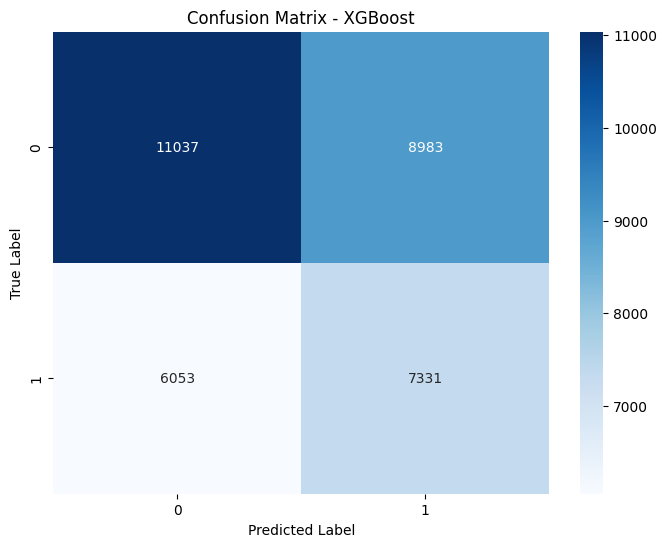


Feature Importance:
  Component  Importance
1       PC2    0.284044
2       PC3    0.257029
0       PC1    0.241227
3       PC4    0.217700


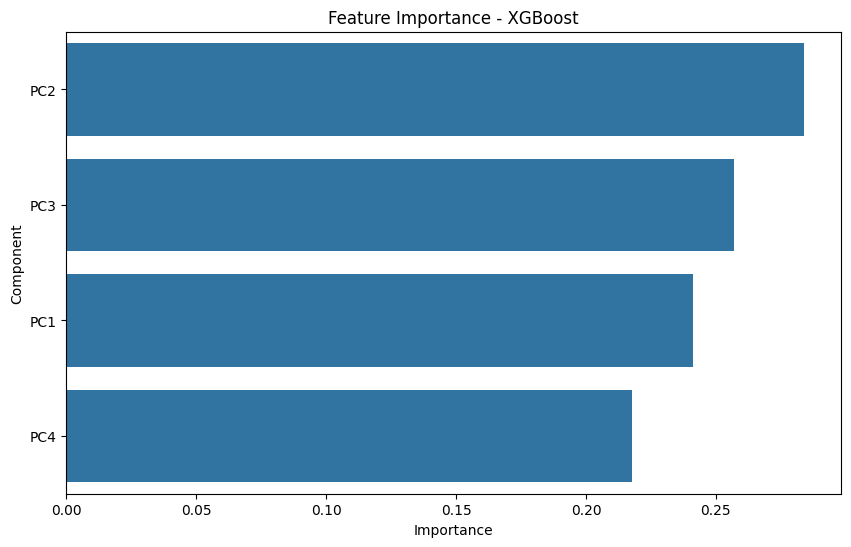

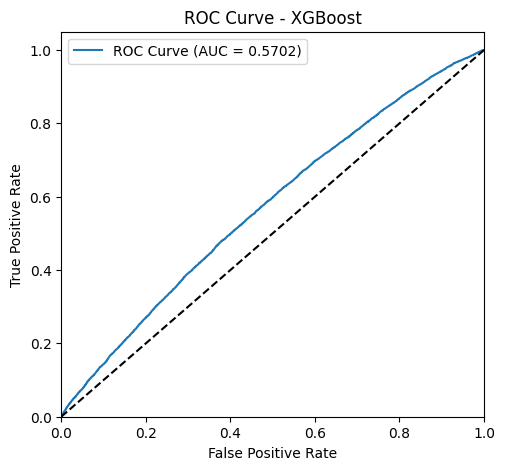

In [53]:
# Detailed analysis on best model
# Confusion Matrix
y_pred_best = test_results[best_model_name]['predictions']
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Component': pca_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print("\nFeature Importance:")
    print(feature_importance)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Component')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.show()

    y_pred_proba_best = test_results[best_model_name]['probabilities'][:, 1]

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_best)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {test_results[best_model_name]["roc_auc"]:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend()

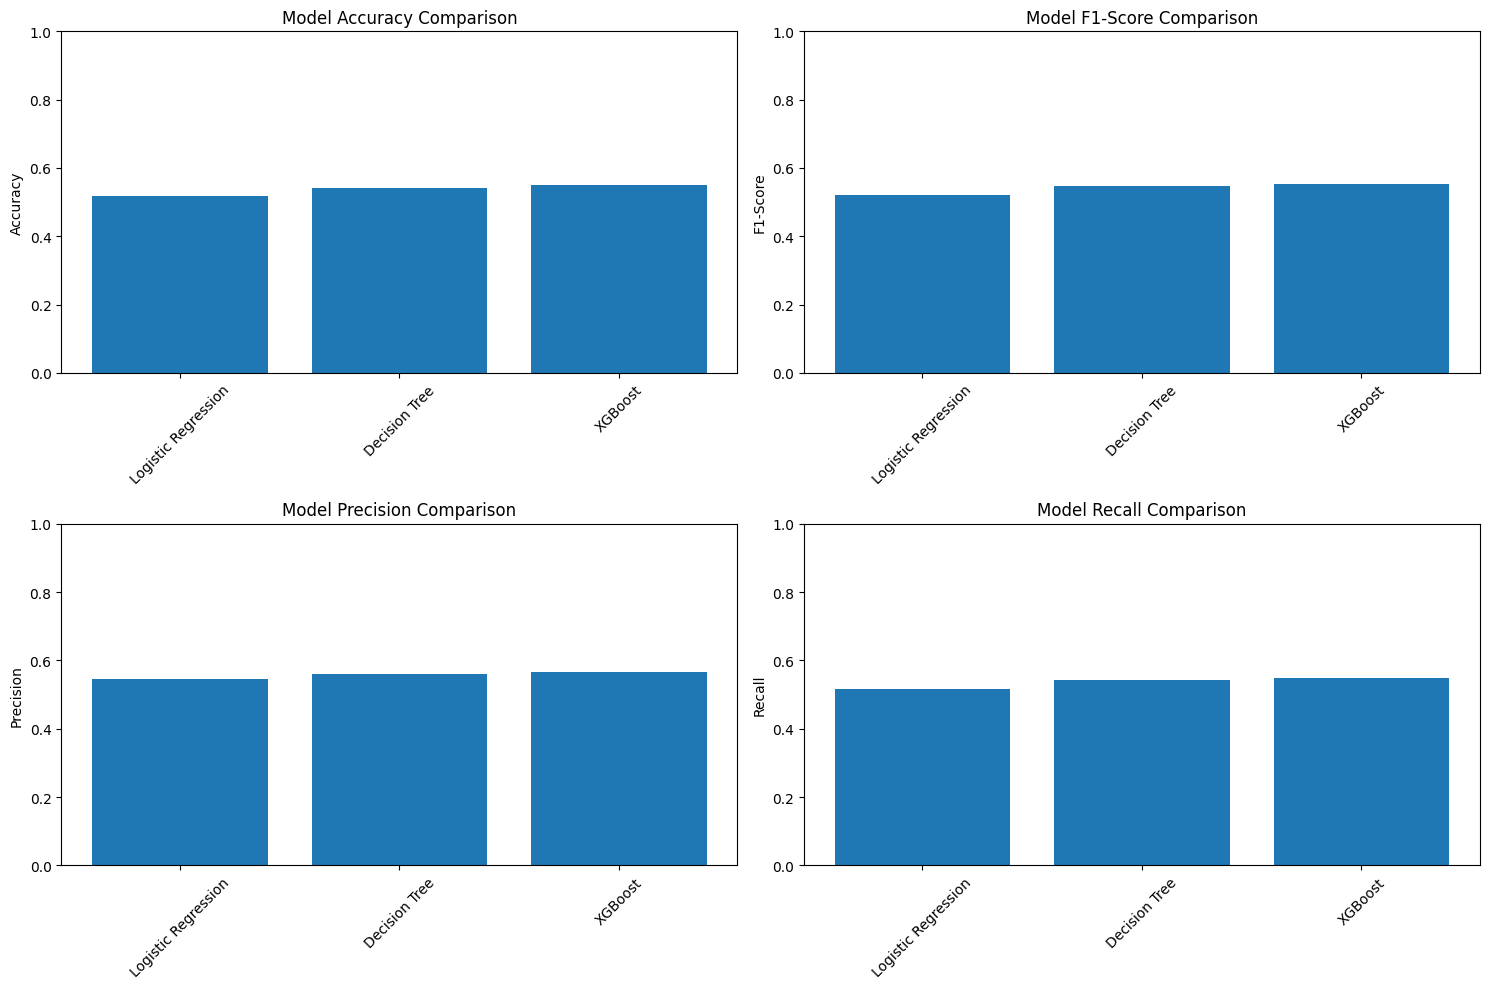

In [54]:
# Model performance
# Performance comparison bar plot
plt.figure(figsize=(15, 10))

# Accuracy comparison
plt.subplot(2, 2, 1)
models_list = list(comparison_df.index)
accuracy_scores = comparison_df['accuracy'].values
plt.bar(models_list, accuracy_scores)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# F1-Score comparison
plt.subplot(2, 2, 2)
f1_scores = comparison_df['f1_score'].values
plt.bar(models_list, f1_scores)
plt.title('Model F1-Score Comparison')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Precision comparison
plt.subplot(2, 2, 3)
precision_scores = comparison_df['precision'].values
plt.bar(models_list, precision_scores)
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Recall comparison
plt.subplot(2, 2, 4)
recall_scores = comparison_df['recall'].values
plt.bar(models_list, recall_scores)
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()



In [56]:
# Saving results
# Save comparison results
comparison_df.to_csv('model_comparison_results.csv')

# Save detailed results
import json

# Prepare results for JSON serialization
json_results = {}
for model_name, metrics in test_results.items():
    json_results[model_name] = {
        'accuracy': float(metrics['accuracy']),
        'precision': float(metrics['precision']),
        'recall': float(metrics['recall']),
        'f1_score': float(metrics['f1_score']),
        'cv_mean': float(metrics['cv_mean']),
        'cv_std': float(metrics['cv_std'])
    }
    if 'roc_auc' in metrics:
        json_results[model_name]['roc_auc'] = float(metrics['roc_auc'])

# Add best model info
json_results['best_model'] = {
    'name': best_model_name,
    'score': float(comparison_df.loc[best_model_name, primary_metric])
}

# Add PCA info
json_results['pca_info'] = {
    'n_components': 12,
    'variance_explained': float(pca.explained_variance_ratio_.sum()),
    'variance_per_component': pca.explained_variance_ratio_.tolist()
}

# Save to JSON
with open('ml_pipeline_results.json', 'w') as f:
    json.dump(json_results, f, indent=2)

# Save best model
import joblib
joblib.dump(best_model, f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl')
joblib.dump(pca, 'pca_transformer.pkl')
joblib.dump(scaler, 'scaler.pkl')


# Save feature names and their column means
feature_names = [col for col in data_final.columns if col != 'Target_ChurnFlag']
column_means = data_final[feature_names].mean().to_dict()
with open('feature_names.json', 'w') as f:
    json.dump(feature_names, f)
with open('column_means.json', 'w') as f:
    json.dump(column_means, f)








print("Files saved:")
print("- model_comparison_results.csv")
print("- ml_pipeline_results.json")
print(f"- best_model_{best_model_name.replace(' ', '_').lower()}.pkl")
print("- pca_transformer.pkl")
print("- scaler.pkl ")
print("-feature_names.json")
print("column_means.json")


Files saved:
- model_comparison_results.csv
- ml_pipeline_results.json
- best_model_xgboost.pkl
- pca_transformer.pkl
- scaler.pkl 
-feature_names.json
column_means.json


In [57]:
# Final summary

print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} original features")
print(f"PCA Components:{pca_columns} (explaining {pca.explained_variance_ratio_.sum():.2%} variance)")
print(f"Best Model: {best_model_name}")
print(f"Best Performance ({primary_metric}): {comparison_df.loc[best_model_name, primary_metric]:.4f}")

print("\nTop  Model:")
top = comparison_df.sort_values(primary_metric, ascending=False).head()
for i, (model_name, row) in enumerate(top.iterrows(), 1):
    print(f"{i}. {model_name}: {row[primary_metric]:.4f}")

print(f"\nBest Model Parameters:")
for param, value in results[best_model_name]['best_params'].items():
    print(f"  {param}: {value}")

print("\nML Pipeline completed successfully!")



Dataset: 167020 samples, 185 original features
PCA Components:['PC1', 'PC2', 'PC3', 'PC4'] (explaining 90.73% variance)
Best Model: XGBoost
Best Performance (accuracy): 0.5499

Top  Model:
1. XGBoost: 0.5499
2. Decision Tree: 0.5415
3. Logistic Regression: 0.5178

Best Model Parameters:
  subsample: 0.8
  n_estimators: 200
  max_depth: 7
  learning_rate: 0.2
  colsample_bytree: 1.0

ML Pipeline completed successfully!


In [61]:
import pandas as pd
import numpy as np
import joblib

def predict_new_data(new_data, 
                     model_path='best_model_xgboost.pkl', 
                     pca_path='pca_transformer.pkl', 
                     scaler_path='scaler.pkl'):
    """
    Function to make predictions on new, preprocessed data.
    """
    try:

        loaded_model = joblib.load(model_path)
        loaded_pca = joblib.load(pca_path)
        loaded_scaler = joblib.load(scaler_path)

        # Identify the columns the scaler was trained on
        continuous_cols = loaded_scaler.feature_names_in_
        
        if not all(col in new_data.columns for col in continuous_cols):
            missing_cols = set(continuous_cols) - set(new_data.columns)
            raise ValueError(f"Input data is missing the following required columns: {list(missing_cols)}")

    
        processed_data = new_data.copy()
        #Scale only the continuous numerical features
        processed_data[continuous_cols] = loaded_scaler.transform(new_data[continuous_cols])
        #Apply PCA transformation to the entire preprocessed dataframe
        new_data_pca = loaded_pca.transform(processed_data)
        # Make predictions
        predictions = loaded_model.predict(new_data_pca)
        
        
        probabilities = loaded_model.predict_proba(new_data_pca)[:, 1] 
        
        return predictions, probabilities

    except FileNotFoundError as e:
        print(f"Error: A required file was not found. {e}")
        return None, None
    except Exception as e:
        print(f"An error occurred during prediction: {e}")
        return None, None
try:
    
    preprocessed_data = pd.read_csv('data_for_modeliing.csv').drop(columns=['Target_ChurnFlag']) 
    #Use new preprocessed data with categorical columns encoded, missing values imputed and outliers handled
    sample_data = preprocessed_data.head(5)
    preds, probs = predict_new_data(sample_data)
    
    if preds is not None:
        print("Prediction function is ready and tested successfully!")
        print("\nExample Prediction on 5 Samples")
        result_df = pd.DataFrame({
            'Prediction': ['Churn' if p == 1 else 'No Churn' for p in preds],
            'Churn Probability': [f"{p:.2%}" for p in probs]
        })
        print(result_df)

except FileNotFoundError:
    print("\nCould not find the required csv file to run the example usage.")
except Exception as e:
    print(f"\nAn error occurred during the example run: {e}")



Prediction function is ready and tested successfully!

Example Prediction on 5 Samples
  Prediction Churn Probability
0   No Churn            48.63%
1   No Churn            49.22%
2      Churn            58.92%
3   No Churn            43.44%
4      Churn            51.74%
